In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Load data set of Iris
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Exploring Data Analysis

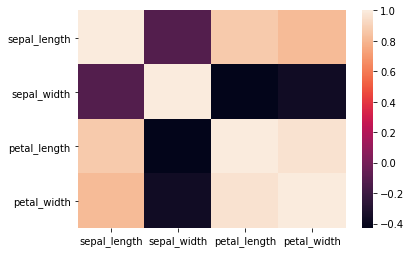

In [14]:
### Heatmap
sns.heatmap(data=df.corr())

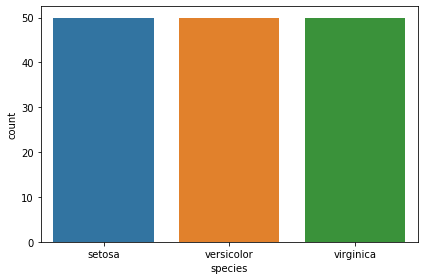

In [20]:
sns.countplot(data=df,x='species')
plt.tight_layout()

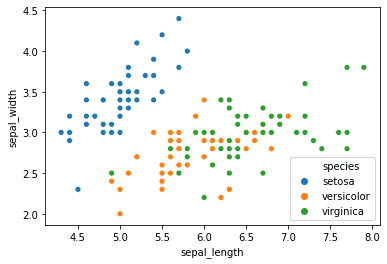

In [21]:
sns.scatterplot(x='sepal_length',y='sepal_width',data=df,hue='species')

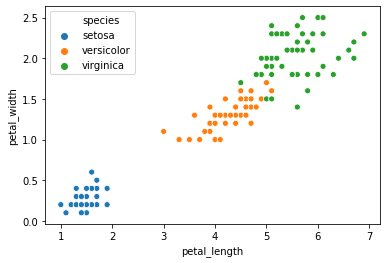

In [22]:
sns.scatterplot(x='petal_length',y='petal_width',data=df,hue='species')

### Prepare Data Set

In [4]:
# X = data feature
X = df.drop(columns='species')

# y = data target
y = df['species']

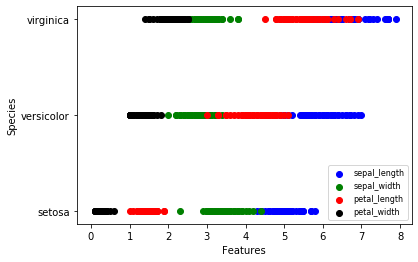

In [5]:
# Plot the relation of each feature with each species
plt.xlabel('Features')
plt.ylabel('Species')

plotX = df.loc[:,'sepal_length']
ploty = df.loc[:,'species']
plt.scatter(plotX,ploty,color='blue',label = 'sepal_length')

plotX = df.loc[:,'sepal_width']
ploty = df['species']
plt.scatter(plotX,ploty,color='green',label = 'sepal_width')

plotX = df.loc[:,'petal_length']
ploty = df['species']
plt.scatter(plotX,ploty,color='red',label = 'petal_length')

plotX = df.loc[:,'petal_width']
ploty = df['species']
plt.scatter(plotX,ploty,color='black',label = 'petal_width')

plt.legend(loc=4,prop={'size':8})
plt.show()

In [6]:
# Split the data into 80% training, 20% test
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### K-Nearest-Neighbors

In [7]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(x_train,y_train)
    y_pred = model_knn.predict(x_test)
    scores.append(accuracy_score(y_test,y_pred))

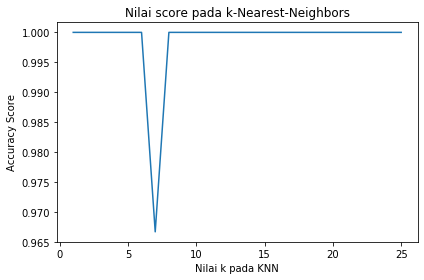

In [8]:
plt.plot(k_range, scores)
plt.xlabel('Nilai k pada KNN')
plt.ylabel('Accuracy Score')
plt.title('Nilai score pada k-Nearest-Neighbors')
plt.tight_layout()
plt.show()

In [12]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Logistic Regression

In [10]:
model_logreg = LogisticRegression(solver='lbfgs',multi_class='auto')
model_logreg.fit(x_train,y_train)
y_pred = model_logreg.predict(x_test)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [13]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

